<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793546-Ariel-Corral-Leon/blob/main/Reduccion_dimensiones_Actividad_5_Ariel_Corral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

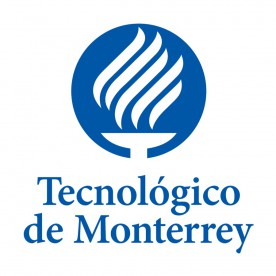

#Ciencia y analítica de datos 

###Actividad Semanal -- 5 Repaso Transformación y reducción de dimensiones

#### Nombre: ***José Ariel Corral Leon***
#### Matricula: ***A01793546***

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [2]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A0 = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
A1 = array([[3, 0, 3], [3, 0, -2], [0, 1, 1]])
A2 = array([[1, 3, 8], [2, 0, 0], [0, 0, 1]])
A3 = array([[5, 4, 0], [1, 0, 1], [10, 7, 1]])
print("-------Matriz original-------")
print(A0)

# calcula la eigendescomposición

A0n, A0m = A0.shape
print("-------A0 shape------------")
print("Tipo de Arreglo: ",A0.shape)
print("------eigen descomposición values -------------")
print("Eje 'm': ",A0n)
print("Eje 'n': ",A0m)

#Compute covariance matrix

#print("--- Valores y Vectores---------------")
#A0C = np.dot(A0.T, A0) / (A0n-1)
#print(A0C)
A0values, A0vectors = eig(A0)

#Ejemplo de reconstrucción

print("--- Valores nuevos de A0---------------")
print("Valor eig: \n ",np.linalg.eig(A0))
print("--- Valores y Vectores---------------")
print("Valores: ",A0values) #D
print("Vectores: \n",A0vectors) #W
print("--------------------------------")
A0W = A0vectors
A0Winv = np.linalg.inv(A0W)
A0D = np.diag(A0values)

#la matriz B tiene que dar igual a A
#reconstruye la matriz 

print("-------Matriz reconstruida-------")

# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------

A0m1 = np.matmul(A0W,A0D)
A0m2 = np.matmul(A0m1,A0Winv)
A0B= A0m2
print(A0B.round(0).real.astype(int))
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-------A0 shape------------
Tipo de Arreglo:  (3, 3)
------eigen descomposición values -------------
Eje 'm':  3
Eje 'n':  3
--- Valores nuevos de A0---------------
Valor eig: 
  (array([ 1.61168440e+01, -1.11684397e+00, -1.30367773e-15]), array([[-0.23197069, -0.78583024,  0.40824829],
       [-0.52532209, -0.08675134, -0.81649658],
       [-0.8186735 ,  0.61232756,  0.40824829]]))
--- Valores y Vectores---------------
Valores:  [ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
Vectores: 
 [[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
--------------------------------
-------Matriz reconstruida-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------


In [3]:
#Matriz 1
A1 = array([[3, 0, 3], [3, 0, -2], [0, 1, 1]])
A2 = array([[1, 3, 8], [2, 0, 0], [0, 0, 1]])
A3 = array([[5, 4, 0], [1, 0, 1], [10, 7, 1]])
print("-------Matriz original A1-------")
print(A1)

# calcula la eigendescomposición

A1n, A1m = A1.shape
print("-------A1 shape------------")
print("Tipo de Arreglo: ",A1.shape)
print("------eigen descomposición values -------------")
print("Eje 'm': ",A1n)
print("Eje 'n': ",A1m)

#Compute covariance matrix

#print("--- Valores y Vectores---------------")
#A0C = np.dot(A0.T, A0) / (A0n-1)
#print(A0C)
A1values, A1vectors = eig(A1)

#Ejemplo de reconstrucción

print("--- Valores nuevos de A1---------------")
print("Valor eig: \n ",eig(A1))
print("--- Valores y Vectores---------------")
print("Valores: ",A1values) #D
print("Vectores: \n",A1vectors) #W
print("--------------------------------")
A1W = A1vectors
A1Winv = np.linalg.inv(A1W)
A1D = np.diag(A1values)

#la matriz B tiene que dar igual a A
#reconstruye la matriz 

print("-------Matriz reconstruida-------")

# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------

A1m1 = np.matmul(A1W,A1D)
A1m2 = np.matmul(A1m1,A1Winv)
A1B= A1m2
print(A1B.round(0).real.astype(int))
print("-----------------------------")

-------Matriz original A1-------
[[ 3  0  3]
 [ 3  0 -2]
 [ 0  1  1]]
-------A1 shape------------
Tipo de Arreglo:  (3, 3)
------eigen descomposición values -------------
Eje 'm':  3
Eje 'n':  3
--- Valores nuevos de A1---------------
Valor eig: 
  (array([3.73628444+0.j        , 0.13185778+1.99932418j,
       0.13185778-1.99932418j]), array([[-0.81345737+0.j        , -0.06663688+0.33023725j,
        -0.06663688-0.33023725j],
       [-0.54628642+0.j        ,  0.85577709+0.j        ,
         0.85577709-0.j        ],
       [-0.19964533+0.j        , -0.15637575-0.36013204j,
        -0.15637575+0.36013204j]]))
--- Valores y Vectores---------------
Valores:  [3.73628444+0.j         0.13185778+1.99932418j 0.13185778-1.99932418j]
Vectores: 
 [[-0.81345737+0.j         -0.06663688+0.33023725j -0.06663688-0.33023725j]
 [-0.54628642+0.j          0.85577709+0.j          0.85577709-0.j        ]
 [-0.19964533+0.j         -0.15637575-0.36013204j -0.15637575+0.36013204j]]
---------------------------

In [4]:
#Matriz 2
A2 = array([[1, 3, 8], [2, 0, 0], [0, 0, 1]])
A3 = array([[5, 4, 0], [1, 0, 1], [10, 7, 1]])
print("-------Matriz original A2-------")
print(A2)

# calcula la eigendescomposición

A2n, A2m = A2.shape
print("-------A2 shape------------")
print("Tipo de Arreglo: ",A2.shape)
print("------eigen descomposición values -------------")
print("Eje 'm': ",A2n)
print("Eje 'n': ",A2m)

#Compute covariance matrix

#print("--- Valores y Vectores---------------")
#A0C = np.dot(A0.T, A0) / (A0n-1)
#print(A0C)
A2values, A2vectors = eig(A2)

#Ejemplo de reconstrucción

print("--- Valores nuevos de A2---------------")
print("Valor eig: \n ",eig(A2))
print("--- Valores y Vectores---------------")
print("Valores: ",A2values) #D
print("Vectores: \n",A2vectors) #W
print("--------------------------------")
A2W = A2vectors
A2Winv = np.linalg.inv(A2W)
A2D = np.diag(A2values)

#la matriz B tiene que dar igual a A
#reconstruye la matriz 

print("-------Matriz reconstruida-------")

# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------

A2m1 = np.matmul(A2W,A2D)
A2m2 = np.matmul(A2m1,A2Winv)
A2B= A2m2
print(A2B.round(0).real.astype(int))
print("-----------------------------")

-------Matriz original A2-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-------A2 shape------------
Tipo de Arreglo:  (3, 3)
------eigen descomposición values -------------
Eje 'm':  3
Eje 'n':  3
--- Valores nuevos de A2---------------
Valor eig: 
  (array([ 3., -2.,  1.]), array([[ 0.83205029, -0.70710678, -0.42399915],
       [ 0.5547002 ,  0.70710678, -0.8479983 ],
       [ 0.        ,  0.        ,  0.31799936]]))
--- Valores y Vectores---------------
Valores:  [ 3. -2.  1.]
Vectores: 
 [[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]
--------------------------------
-------Matriz reconstruida-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------


In [5]:
#Matriz 3
A3 = array([[5, 4, 0], [1, 0, 1], [10, 7, 1]])
print("-------Matriz original A3-------")
print(A3)

# calcula la eigendescomposición

A3n, A3m = A3.shape
print("-------A3 shape------------")
print("Tipo de Arreglo: ",A3.shape)
print("------eigen descomposición values -------------")
print("Eje 'm': ",A3n)
print("Eje 'n': ",A3m)

#Compute covariance matrix

#print("--- Valores y Vectores---------------")
#A0C = np.dot(A0.T, A0) / (A0n-1)
#print(A0C)
A3values, A3vectors = eig(A3)

#Ejemplo de reconstrucción

print("--- Valores nuevos de A3---------------")
print("Valor eig: \n ",eig(A3))
print("--- Valores y Vectores---------------")
print("Valores: ",A3values) #D
print("Vectores: \n",A3vectors) #W
print("--------------------------------")
A3W = A3vectors
A3Winv = np.linalg.inv(A3W)
A3D = np.diag(A3values)

#la matriz B tiene que dar igual a A
#reconstruye la matriz 

print("-------Matriz reconstruida-------")

# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------

A3m1 = np.matmul(A3W,A3D)
A3m2 = np.matmul(A3m1,A3Winv)
A3B= A3m2
print(A3B.round(0).real.astype(int))
print("-----------------------------")

-------Matriz original A3-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-------A3 shape------------
Tipo de Arreglo:  (3, 3)
------eigen descomposición values -------------
Eje 'm':  3
Eje 'n':  3
--- Valores nuevos de A3---------------
Valor eig: 
  (array([ 6.89167094, -0.214175  , -0.67749594]), array([[ 0.3975395 ,  0.55738222,  0.57580768],
       [ 0.18800348, -0.72657211, -0.81728644],
       [ 0.89811861, -0.40176864, -0.02209943]]))
--- Valores y Vectores---------------
Valores:  [ 6.89167094 -0.214175   -0.67749594]
Vectores: 
 [[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]
--------------------------------
-------Matriz reconstruida-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


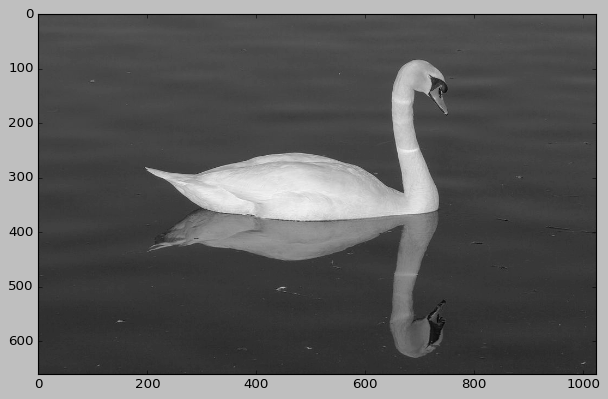

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F08063461D0>


In [ ]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [ ]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [ ]:
U.shape

(660, 660)

In [ ]:
V.shape

(1024, 1024)

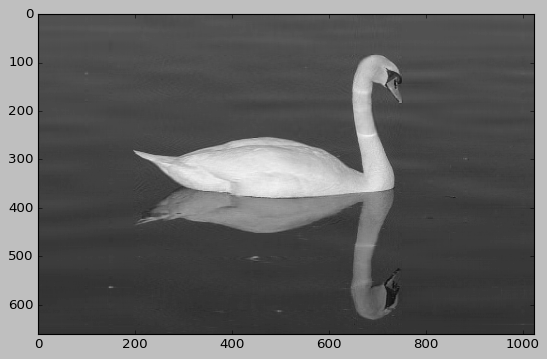

Felicidades la imagen está comprimida


In [ ]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 70
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

NASA’s Webb Reveals Cosmic Cliffs, Glittering Landscape of Star Birth
[24. 23. 22. ... 25. 26. 26.]


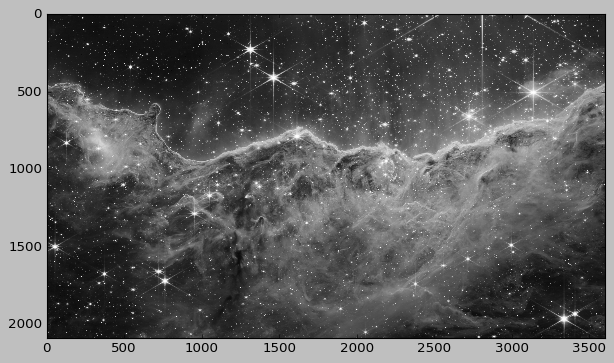

<PIL.Image.Image image mode=LA size=3600x2085 at 0x7F08036F6150>
(2085, 2085)
(3600, 3600)


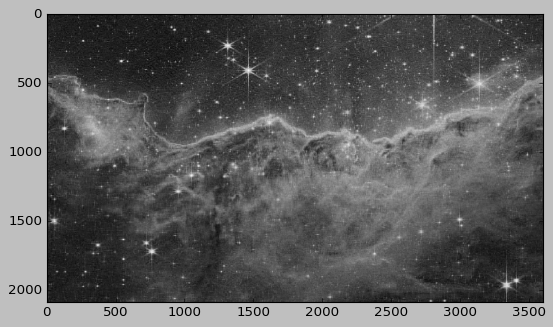

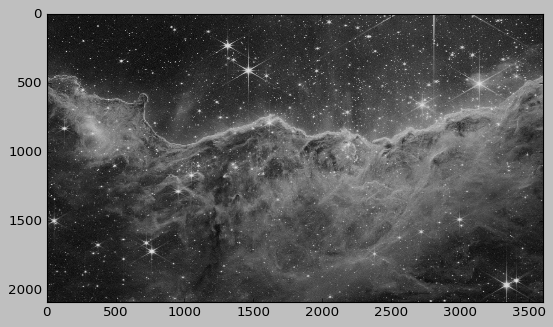

Felicidades la imagen está comprimida


In [ ]:
#imagen 1
plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://www.nasa.gov/sites/default/files/thumbnails/image/main_image_star-forming_region_carina_nircam_final-5mb.jpg')).convert('LA')
#img = Image.open('NASA’s Webb Reveals Cosmic Cliffs, Glittering Landscape of Star Birth')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)
print("NASA’s Webb Reveals Cosmic Cliffs, Glittering Landscape of Star Birth")
print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)
U,D,V = np.linalg.svd(imgmat)
imgmat.shape
print(U.shape)
print(V.shape)
nvalue = 90
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.imshow(reconstimg,cmap='gray')
plt.show()
nvalue = 250
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.imshow(reconstimg, cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

Mapping the Entire Night Sky
[33. 33. 33. ... 33. 33. 33.]


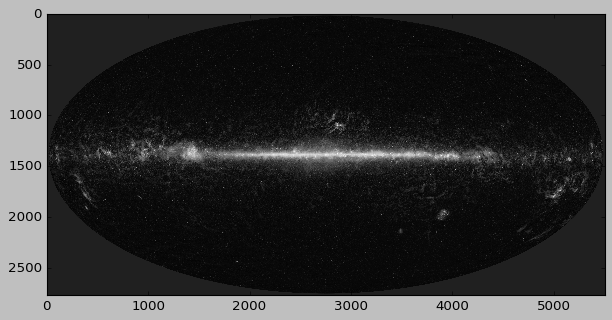

<PIL.Image.Image image mode=LA size=5500x2767 at 0x7F080367E450>
(2767, 2767)
(5500, 5500)


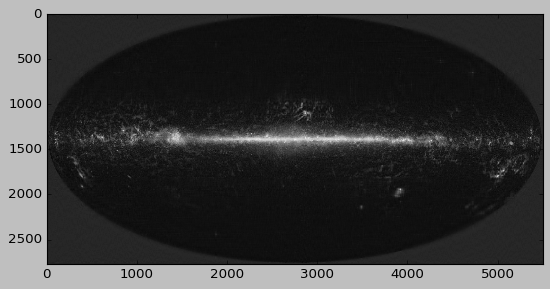

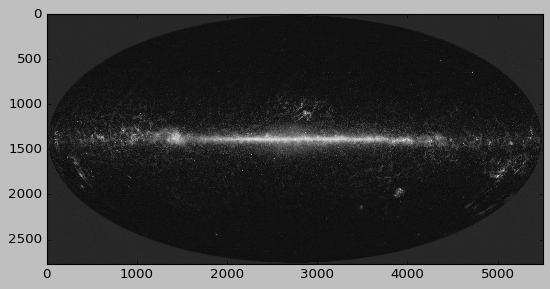

Felicidades la imagen está comprimida


In [ ]:
#imagen 2
plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://www.nasa.gov/sites/default/files/images/630303main_pia15481c-full_full.jpg')).convert('LA')
#img = Image.open('Mapping the Entire Night Sky')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)
print("Mapping the Entire Night Sky")
print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)
U,D,V = np.linalg.svd(imgmat)
imgmat.shape
print(U.shape)
print(V.shape)
nvalue = 100
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.imshow(reconstimg,cmap='gray')
plt.show()
nvalue = 600
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.imshow(reconstimg, cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

Candy-Colored JunoCam Image of Europa
[0. 0. 0. ... 0. 0. 0.]


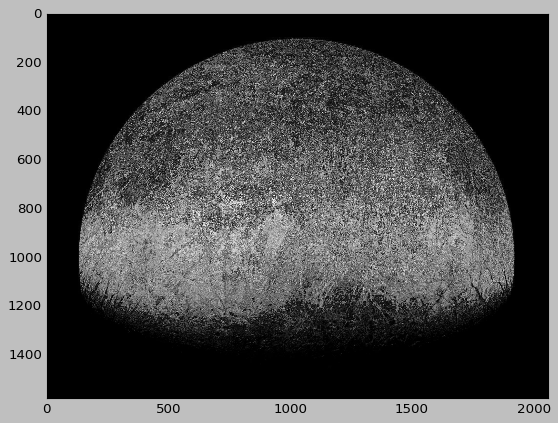

<PIL.Image.Image image mode=LA size=2058x1577 at 0x7F08033963D0>
(1577, 1577)
(2058, 2058)


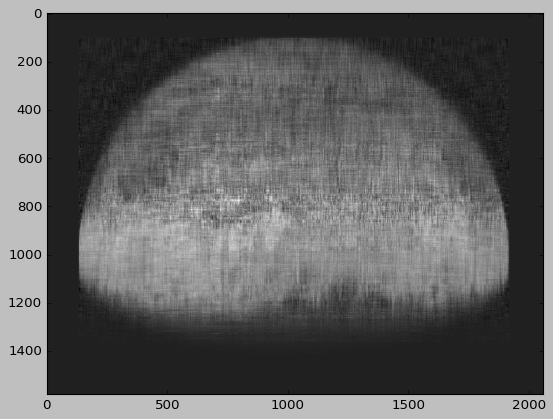

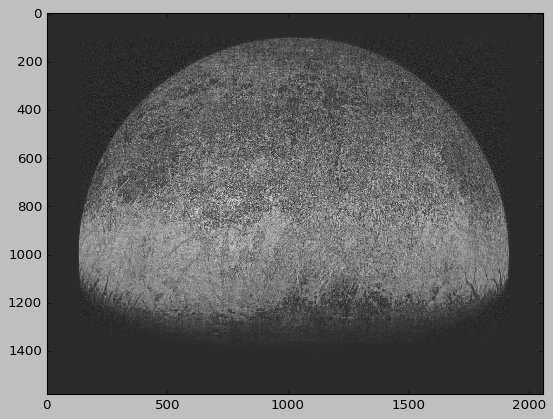

Felicidades la imagen está comprimida


In [ ]:
#imagen 3
plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://d2pn8kiwq2w21t.cloudfront.net/original_images/jpegPIA25335.jpg')).convert('LA')
#img = Image.open('Candy-Colored JunoCam Image of Europa')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)
print("Candy-Colored JunoCam Image of Europa")
print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)
U,D,V = np.linalg.svd(imgmat)
imgmat.shape
print(U.shape)
print(V.shape)
nvalue = 20
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.imshow(reconstimg,cmap='gray')
plt.show()
nvalue = 250
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.imshow(reconstimg, cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




In [ ]:
#tu codigo aqui
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
# Load the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space



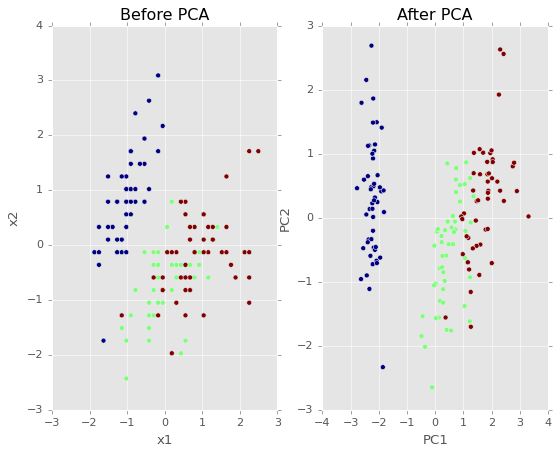

In [ ]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [ ]:
print(pca.explained_variance_ratio_)

np.cov(X_new.T)

[0.72962445 0.22850762]


array([[2.93808505e+00, 5.33928780e-16],
       [5.33928780e-16, 9.20164904e-01]])

In [ ]:
pca.explained_variance_

array([2.93808505, 0.9201649 ])

In [ ]:
print(pca.components_)
print("-----------------------")
print(abs( pca.components_ ))

[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]
-----------------------
[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


#¿Qué es feature importance y para que nos sirve?

Interpreto el concepto de **Feature Importance** como la magnitud con la que se le da el peso correcto a nuestras varibles, com podemos identificar en los valores previamente obtenidos, tenemos que la #1 [.52], #3 [.58] y la #4 [.56] son las que mayor magnitud absoluta tienen indica que es mayor contrbución da a nuestra variable.
<BR><BR>*The larger they are these absolute values, the more a specific feature contributes to that principal component.*


In [ ]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

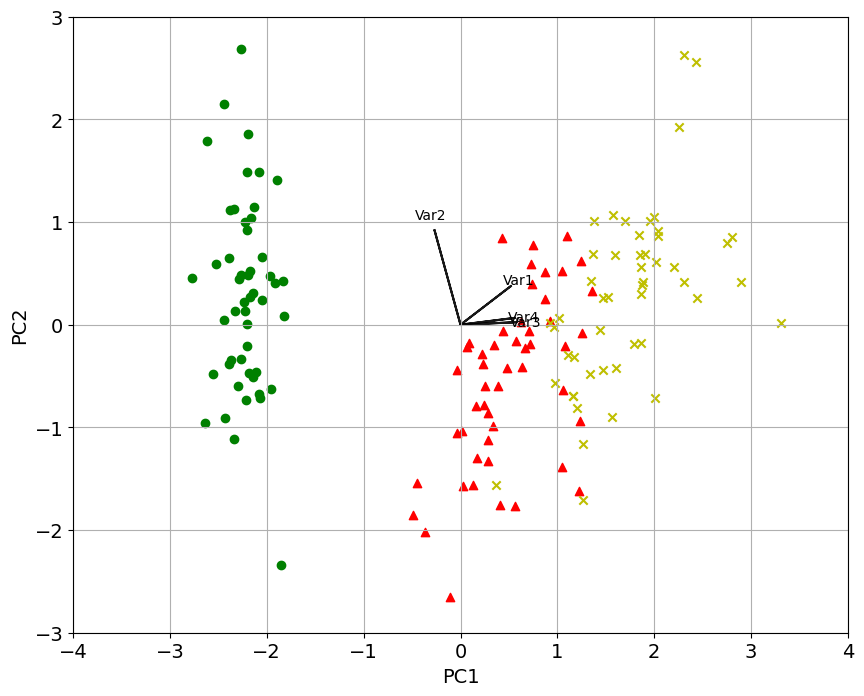

In [ ]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

In [ ]:
#Confirmación de correlacion de las variables 1,3,4
print("variable 1,3,4")
np.corrcoef(X[:,2], X[:,3])[1,0]


variable 1,3,4


0.9628654314027957

In [ ]:
print("variable 2")
np.corrcoef(X[:,1], X[:,2])[1,0]

variable 2


-0.42844010433054014

#¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?

La forma en la que podemos visualizar como nua variable realmente esta contribuyendo o dandole peso a nuestras variables

#¿Dónde lo aplicarías o te sería de utilidad este conocimiento?

Considero que este puede ser un metodo practico y sencillo de poder demostrar la contribución que tiene un conjunto de datos con respecto al universo de datos, pienso que podría ser el caso practico de como es que un equipo con diferentes variables (de sensores analógicos y digitales) que se guardan en una base de datos, se pueda ver como una tiene mayor contribución que otra y como este puede afectar el desempeño de un equipo
Aunque tengo un poco de idea de como poder utilizarlo, aun tengo algunas dudas sobre la practica en como poder yo definir que variables serían las que necesito considerar, en este caso de talvez en la base de datos tenga un elemento que sea mi "disparador" de comportamiento y/o eficiencia, es decir que este sea el que quiera cuidar o monitorear como primario.

Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

#**Conclusiones:**

Desde el principio, me ha costado un poco de trabajo, tiene algo de tiempo que muchas terminologías y aplicaciones matemáticas no las había aplicado, poco a poco y con estos ejercicios, he estado refrescando en algunos casos y en algunos otros, aprendiendo cosas nuevas, si bien para el primer ejercicio aun no logro entender cómo es que al multiplicar las matrices no me daba exactamente el arreglo inicial, si parece ser que de entrada los números irreales juegan un papel importante aquí, y aunque aún investigare este concepto hasta que me quede claro, me ha ayudado a entender el manejo de los arreglos, sobre todo el comprender que no son *“matrices numéricas únicamente”* sino que bien estos pueden ser datos originales de un dataset que puede tener un “n” número de columnas por “m” número de filas y esto hace nuestro arreglo de datos **[ n x m ]**.
<BR><BR>Incluso con el ejercicio práctico de comprimir las imágenes logre identificar algo que regularmente hago *(compactar imágenes para ahorrar espacio)*, pero que erróneamente comprendía antes, esto ha sido ciertamente revelador para mi persona. Ahora, cada que veo una imagen puedes visualizar el hecho de que este es igualmente un conjunto de datos que contienen diferentes valores que incluso podría atreverme a decir que son valores que dan la tonalidad por segmento  (como si fueran los pixeles de un monitor) y me da pauta a pensar que estas igualmente podrán ser procesadas por un modelo para determinar por ejemplo si una fotografía contiene la fotografía de un *“gato”* por ejemplo o si es un *“auto”*, aunque se que esto debe de ser mucho más complejo, ahora puedo construir esta base que me ha ayudado a darme cuenta que si bien esto tiene su complejidad, hay herramientas como estas librerías y códigos que nos ayudarán a realizar estas tareas para hacer más eficientes procesos
<BR><BR>En cuanto a PCA, ahora logro entender mucho más cómo es que este interactúa con nuestros datos y cómo es que podemos identificar los mayores contribuidores y sus respectivas correlaciones
Aun tengo algunas preguntas que espero poder resolver próximamente ya que puedo ver que analizamos de nuestros datasets las variables o features que son contribuidores en la correlación de nuestros datos, pero me surgio una pregunta (tratando de darle una aplicación a todo este conocimiento, por ejemplo, yo podría tener toda una base de datos de recolección de información como por ejemplos, temperaturas, vibraciones, sensores y condiciones de activaciones (booleanas) me imagino que al procesar nuestra base de datos nos va a dar una correlación sobre todos los datos, pero qué pasa si por ejemplo hay una condición sobre la que quisiera determinar todo, por ejemplo si tuviera toda la base de datos (asumiendo que ya tenemos toda nuestra información previamente procesada y balanceada) y nosotros quisiéramos condicionar nuestro análisis a cuando un booleano se cumple, cuando el valor toma un valor de “1”
¿podríamos utilizar estas métricas para ver qué variables son las que más influyen para que el “0” se convierta en “1” y sobre todo como poder preveer que esta condición sea acumulativa?

Por ejemplo, suponiendo que recolectamos todos estos valores directamente desde una servidor y que esta información como planteaba antes, tenemos temperaturas, vibraciones, sensores, y todo esto se lleva a cabo en un sistema que empaqueta productos, pero que entre las vibraciones que pueda tener el transportador, la corriente de los motores y la temperatura del medio ambiente afectan que el producto pueda deformar el empaque (siendo el sistema de visión un sistema que se limita a determinar el “1” como **“NG”** y el “0” como **"OK"**) <BR><BR>Con PCA poder identificar si es que a mayor vibración,  son más las deformaciones de la caja y no derivadas a de la velocidad del conveyor?
